In [4]:
import math
import pandas as pd
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HortonGeneralHospital.csv to HortonGeneralHospital.csv


In [9]:
dataframe = pd.read_csv("HortonGeneralHospital.csv")

dataframe.drop(columns=['Unnamed: 0'], inplace=True)

dataframe.head()

,Cardio,Resp,Hypo,Adm,year,month
0,1,0,0,413,1999,11
1,1,0,0,443,1999,12
2,1,0,0,378,2000,1
3,0,0,0,385,2000,2
4,1,0,0,388,2000,3


In [ ]:
import random

n_test = int(math.ceil(len(dataframe) * 0.3))
random.seed(42)
test_ixs = random.sample(list(range(len(dataframe))), n_test)
train_ixs = [ix for ix in range(len(dataframe)) if ix not in test_ixs]
train = dataframe.iloc[train_ixs, :]
test = dataframe.iloc[test_ixs, :]
print(len(train))
print(len(test))

97
42


In [ ]:
features = ['Adm', 'Resp' , 'Hypo']
response = 'Cardio'

x_train = train[features]
y_train = train[response]
x_test = test[features]
y_test = test[response]

In [ ]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

In [ ]:
hidden_units = 10     # how many neurons in the hidden layer
activation = 'relu'   # activation function for hidden layer
l2 = 0.01             # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 5            # how many epochs to train for
batch_size = 16       # how many samples to use for each gradient descent update

In [ ]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Epoch 1/5
7/7 [==============================] - 1s 2ms/step - loss: 0.5577 - accuracy: 0.3805
Epoch 2/5
7/7 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.3975
Epoch 3/5
7/7 [==============================] - 0s 3ms/step - loss: 0.3557 - accuracy: 0.4125
Epoch 4/5
7/7 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.4238
Epoch 5/5
2/2 [==============================] - 0s 6ms/step - loss: 0.5730 - accuracy: 0.4286
Training accuracy: 0.4020618498325348
Testing accuracy: 0.4285714328289032


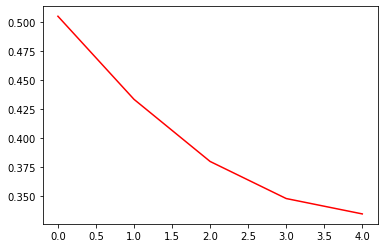

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [ ]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size,
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs


In [ ]:
_, test_accs = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████| 20/20 [00:04<00:00,  4.91it/s]

Avgerage Training Accuracy: 0.4020618498325348
Avgerage Testing Accuracy: 0.4285714328289032


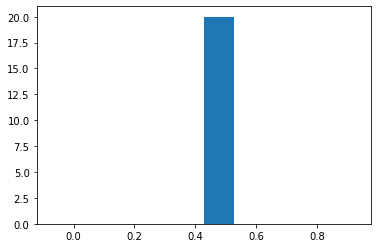

In [ ]:
plt.hist(test_accs)
plt.show()

In [ ]:
print('Min: %s' % np.min(test_accs))
print('Max: %s' % np.max(test_accs))

Min: 0.4285714328289032
Max: 0.4285714328289032


In [ ]:
hidden_units = 10     # how many neurons in the hidden layer
activation = 'relu'   # activation function for hidden layer
l2 = 0.01             # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 20            # how many epochs to train for
batch_size = 32       # how many samples to use for each gradient descent update

In [ ]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 0.9135 - accuracy: 0.3922
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7618 - accuracy: 0.3735
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6237 - accuracy: 0.4119
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.5457 - accuracy: 0.3837
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.5082 - accuracy: 0.4296
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.3970 - accuracy: 0.3900
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.4356 - accuracy: 0.3858
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 0.3761 - accuracy: 0.4056
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 0.3129 - accuracy: 0.4108
Epoch 10/10
2/2 [==============================] - 0s 7ms/step - loss: 0.5716 - accuracy: 0.4286
Training accuracy: 0.4020618498325348
T

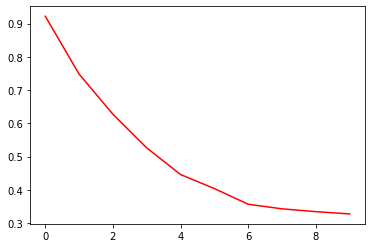

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [ ]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size,
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [ ]:
_, test_accs = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████| 20/20 [00:05<00:00,  3.69it/s]

Avgerage Training Accuracy: 0.4020618498325348
Avgerage Testing Accuracy: 0.4285714328289032


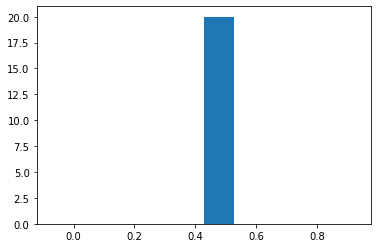

In [ ]:
plt.hist(test_accs)
plt.show()

In [ ]:
print('Min: %s' % np.min(test_accs))
print('Max: %s' % np.max(test_accs))

Min: 0.4285714328289032
Max: 0.4285714328289032


            Cardio  Resp  Hypo  Adm
date                               
2001-11-01       1     1     0  467
2001-12-01       0     1     0  499
2002-01-01       0     0     0  459
2002-02-01       1     0     0  461
2002-03-01       1     0     0  488
Epoch 1/20
10/10 [==============================] - 3s 60ms/step - loss: 0.1818 - val_loss: 0.1750
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 0.1670 - val_loss: 0.1605
Epoch 3/20
10/10 [==============================] - 0s 7ms/step - loss: 0.1535 - val_loss: 0.1468
Epoch 4/20
10/10 [==============================] - 0s 7ms/step - loss: 0.1390 - val_loss: 0.1335
Epoch 5/20
10/10 [==============================] - 0s 9ms/step - loss: 0.1295 - val_loss: 0.1203
Epoch 6/20
10/10 [==============================] - 0s 8ms/step - loss: 0.1149 - val_loss: 0.1072
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 0.1069 - val_loss: 0.0938
Epoch 8/20
10/10 [==============================] - 0s 8ms/st

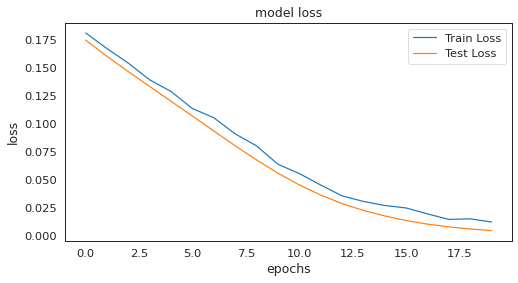

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

from pandas import read_csv
from datetime import datetime
# load data
def parse(x):
	return datetime.strptime(x, '%Y %m')
dataset = read_csv('HortonGeneralHospital.csv',  parse_dates = [["year", "month"]], index_col=0, date_parser=parse)
dataset.drop('Unnamed: 0', axis=1, inplace=True)
# manually specify column names
dataset.columns = [ 'Cardio','Resp','Hypo','Adm']
dataset.index.name = 'date'
# mark all NA values with 0
dataset['Adm'].fillna(0, inplace=True)
# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))
# save to file
dataset.to_csv('Adm.csv')

dataset = read_csv('Adm.csv', header=0, index_col=0)

dataset = dataframe.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


model = Sequential()
model.add(LSTM(4, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()                                                         



train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();
